# Name: Ameer Hamza
# Roll # : Bsef20a003

# Harris Edge Detector

### Converting Image to GrayScale and Smoothing it using Guassian Filter

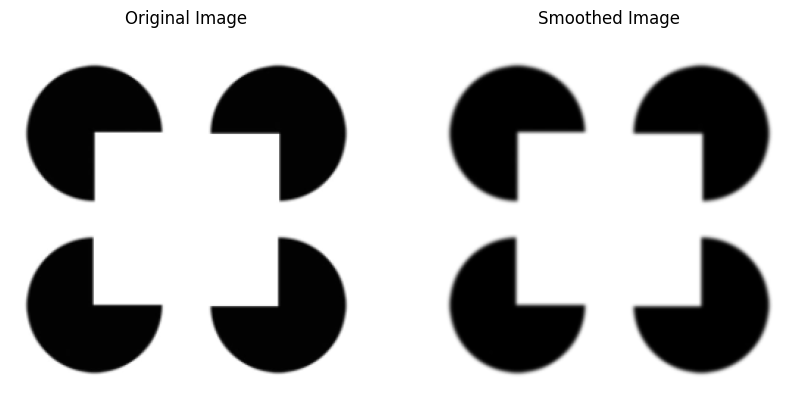

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the image
image = cv2.imread('abc.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Smooth the image using a Gaussian filter
smoothed_image = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=1, sigmaY=1) 

# Display the original and smoothed images using Matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Smoothed Image
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()


### Computing Ix and Iy 

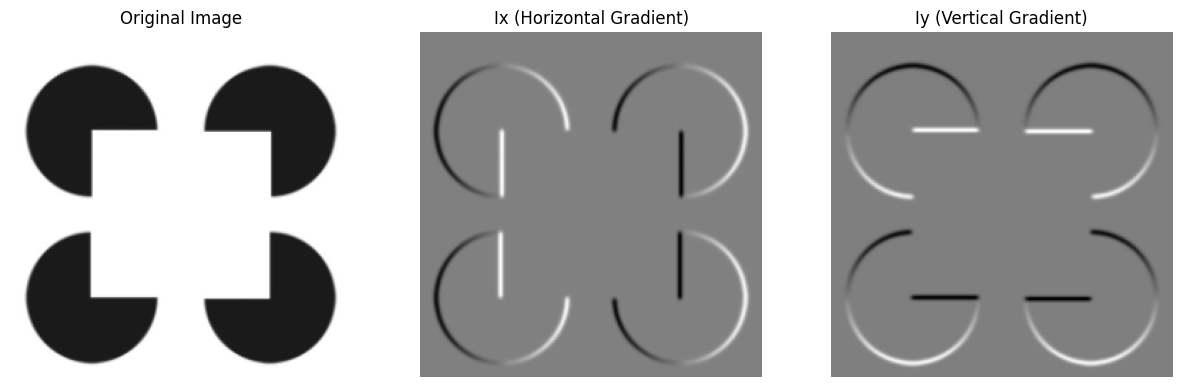

In [84]:
# Compute Ix and Iy using Sobel filters
Ix = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradient
Iy = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradient

# Display the original, Ix, and Iy images using Matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 3, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 3, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

plt.show()

### Compute Ix2, Iy2 and IxIy 

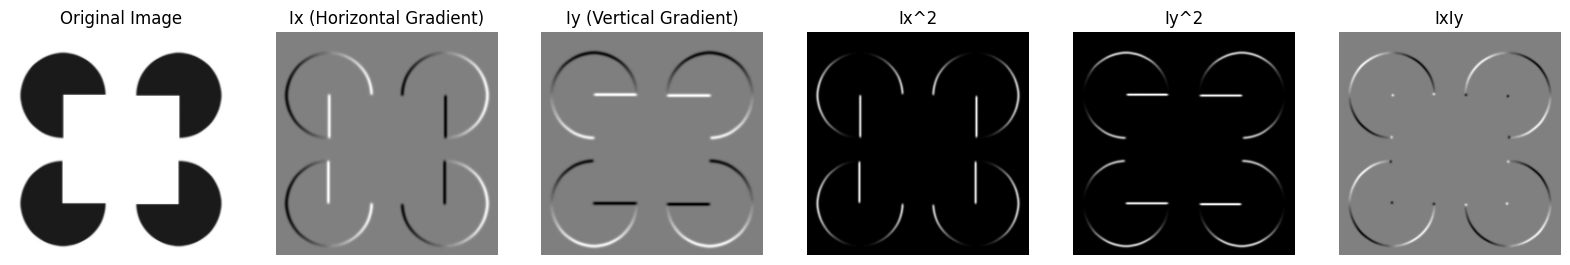

In [85]:
# Compute Ix^2, Iy^2, and IxIy
Ix2 = Ix**2
Iy2 = Iy**2
IxIy = Ix * Iy

# Display the original, Ix, Iy, Ix^2, Iy^2, and IxIy images using Matplotlib
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 6, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 6, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 6, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

# Ix^2
plt.subplot(1, 6, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 6, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 6, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

plt.show()

### Convole the Ix2, Iy2 and IxIy with the Guassian Kernel

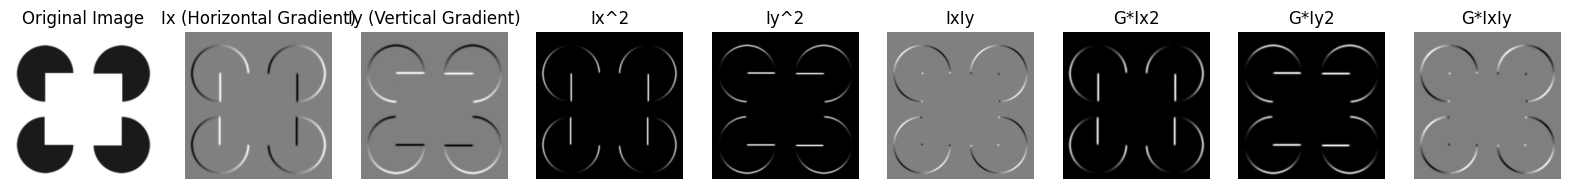

In [86]:
# Define the Gaussian filter
gaussian_kernel = cv2.getGaussianKernel(3, 1)
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel.T)
  
# Convolve with Gaussian filter
G_Ix2 = cv2.filter2D(Ix2, -1, gaussian_kernel_2d)
G_Iy2 = cv2.filter2D(Iy2, -1, gaussian_kernel_2d)
G_IxIy = cv2.filter2D(IxIy, -1, gaussian_kernel_2d)

# Display the original, Ix, Iy, Ix^2, Iy^2, IxIy, G*Ix2, G*Iy2, and G*IxIy images using Matplotlib
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 9, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 9, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 9, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

# Ix^2
plt.subplot(1, 9, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 9, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 9, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

# G*Ix2
plt.subplot(1, 9, 7)
plt.imshow(G_Ix2, cmap='gray')
plt.title('G*Ix2')
plt.axis('off')

# G*Iy2
plt.subplot(1, 9, 8)
plt.imshow(G_Iy2, cmap='gray')
plt.title('G*Iy2')
plt.axis('off')

# G*IxIy
plt.subplot(1, 9, 9)
plt.imshow(G_IxIy, cmap='gray')
plt.title('G*IxIy')
plt.axis('off')

plt.show()

### Determining the determinant and trace from structured tensor

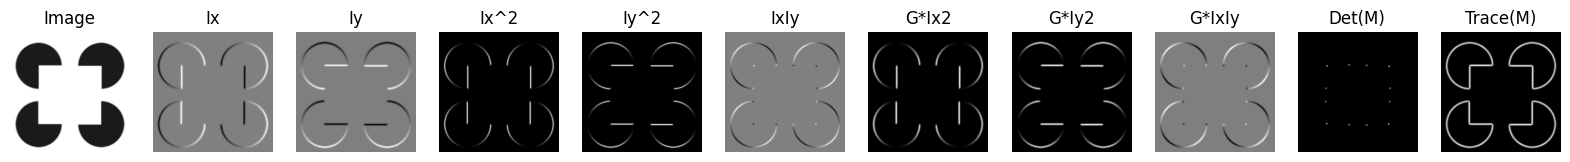

In [87]:
M_Ix2 = G_Ix2
M_Iy2 = G_Iy2
M_IxIy = G_IxIy

# COMPUTE DET(M)
det_M = M_Ix2 * M_Iy2 - M_IxIy ** 2

# COMPUTE TRACE(M)
trace_M = M_Ix2 + M_Iy2

# Display the original, Ix, Iy, Ix^2, Iy^2, IxIy, G*Ix2, G*Iy2, G*IxIy, and the structured tensor M
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 11, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 11, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 11, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')
plt.axis('off')

# Ix^2
plt.subplot(1, 11, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 11, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 11, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

# G*Ix2
plt.subplot(1, 11, 7)
plt.imshow(G_Ix2, cmap='gray')
plt.title('G*Ix2')
plt.axis('off')

# G*Iy2
plt.subplot(1, 11, 8)
plt.imshow(G_Iy2, cmap='gray')
plt.title('G*Iy2')
plt.axis('off')

# G*IxIy
plt.subplot(1, 11, 9)
plt.imshow(G_IxIy, cmap='gray')
plt.title('G*IxIy')
plt.axis('off')

# Determinant of M
plt.subplot(1, 11, 10)
plt.imshow(det_M, cmap='gray')
plt.title('Det(M)')
plt.axis('off')

# Trace of M
plt.subplot(1, 11, 11)
plt.imshow(trace_M, cmap='gray')
plt.title('Trace(M)')
plt.axis('off')

plt.show()

### Compute Cornerness

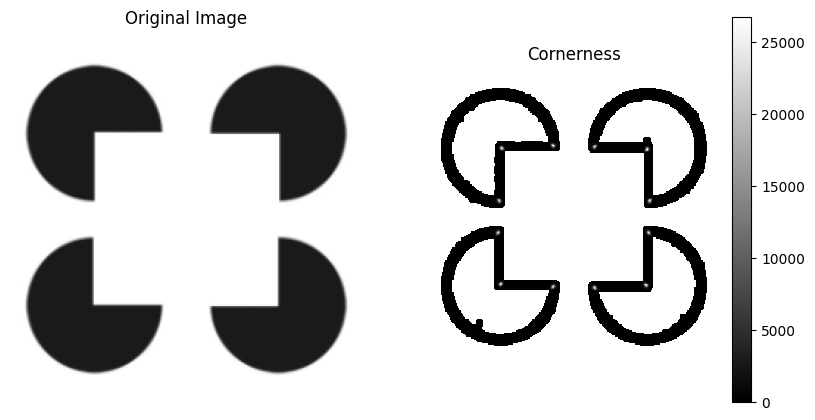

In [88]:
# Calculate cornerness
cornerness = det_M / trace_M

# Display the Cornerness
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Simple Cornerness (R_simple)
plt.subplot(1, 2, 2)
plt.imshow(cornerness, cmap='gray')
plt.title('Cornerness')
plt.colorbar()
plt.axis('off')

plt.show()

### Non Max Supression

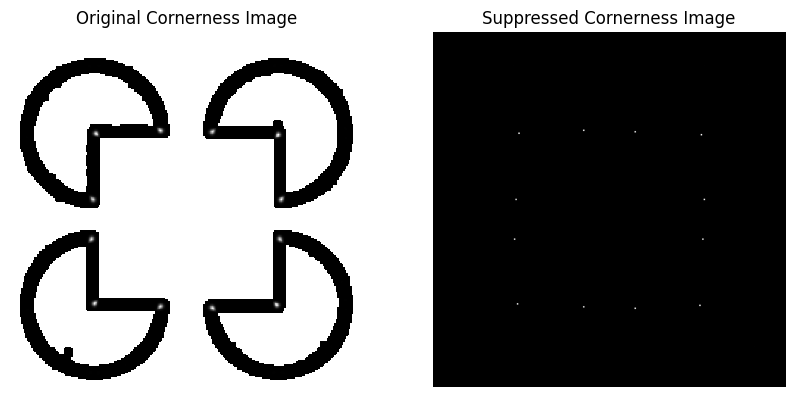

In [89]:
def non_max_suppression(cornerness, neighborhood_size=3):
    suppressed_cornerness = np.zeros_like(cornerness)
    
    # Iterate over the cornerness image
    for i in range(neighborhood_size, cornerness.shape[0] - neighborhood_size):
        for j in range(neighborhood_size, cornerness.shape[1] - neighborhood_size):
            # Get the local neighborhood
            local_region = cornerness[i - neighborhood_size:i + neighborhood_size + 1,
                                       j - neighborhood_size:j + neighborhood_size + 1]
            
            # Check if the center pixel is the maximum in the neighborhood
            if local_region[neighborhood_size, neighborhood_size] == np.max(local_region):
                suppressed_cornerness[i, j] = cornerness[i, j]
    
    return suppressed_cornerness

supressed = non_max_suppression(cornerness)

# Display the results
plt.figure(figsize=(10, 5))

# Original Cornerness Image
plt.subplot(1, 2, 1)
plt.imshow(cornerness, cmap='gray')
plt.title('Original Cornerness Image')
plt.axis('off')

# Suppressed Cornerness Image
plt.subplot(1, 2, 2)
plt.imshow(supressed, cmap='gray')
plt.title('Suppressed Cornerness Image')
plt.axis('off')

plt.show()


### Apply Thresholding

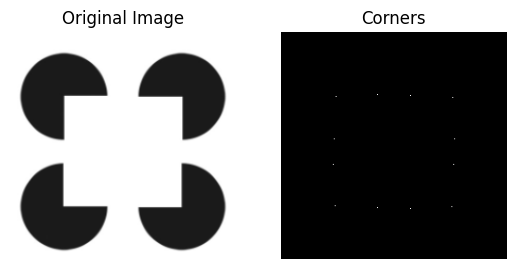

In [90]:
# Thresholding
threshold = 0.01 * np.max(supressed)
corners = np.zeros_like(supressed)
corners[supressed > threshold] = 255

# Original Cornerness Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Suppressed Cornerness Image
plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='gray')
plt.title('Corners')
plt.axis('off')

plt.show()


# Rohr Edge Detector

### Convert Image to GrayScale and smooth using Gaussian Filter

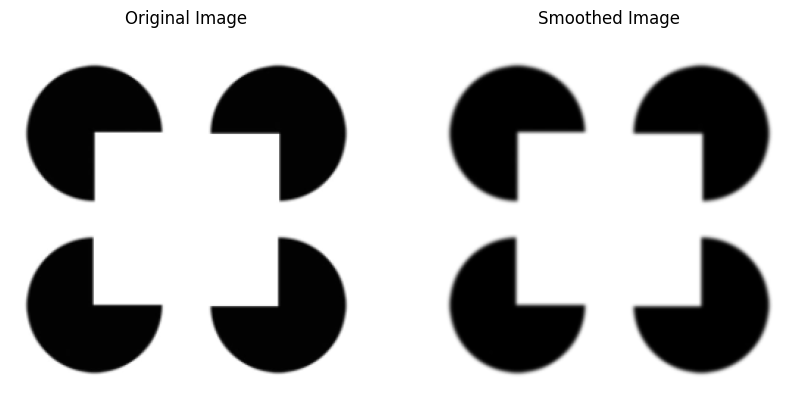

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the image
image = cv2.imread('abc.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Smooth the image using a Gaussian filter
smoothed_image = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=1, sigmaY=1) 

# Display the original and smoothed images using Matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Smoothed Image
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

plt.show()


### Compute Ix and Iy

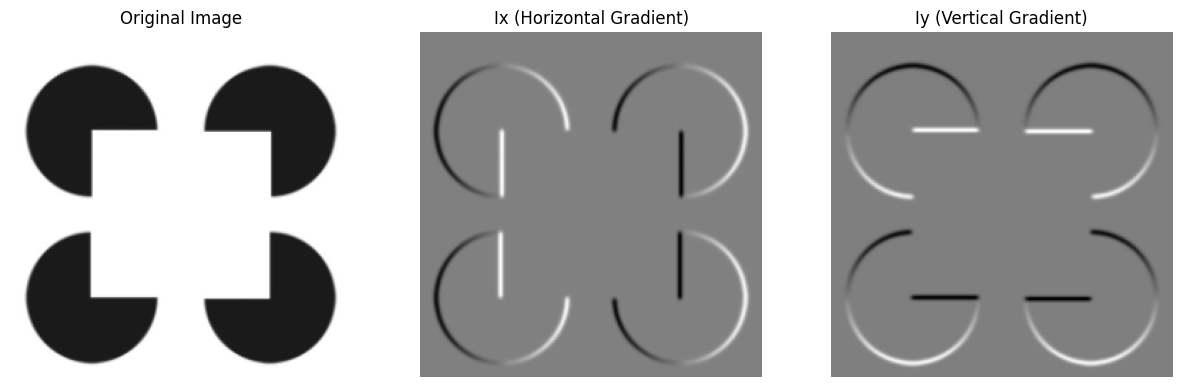

In [92]:
# Compute Ix and Iy using Sobel filters
Ix = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradient
Iy = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradient

# Display the original, Ix, and Iy images using Matplotlib
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 3, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 3, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

plt.show()

### Compute Ix2, Iy2 and IxIy

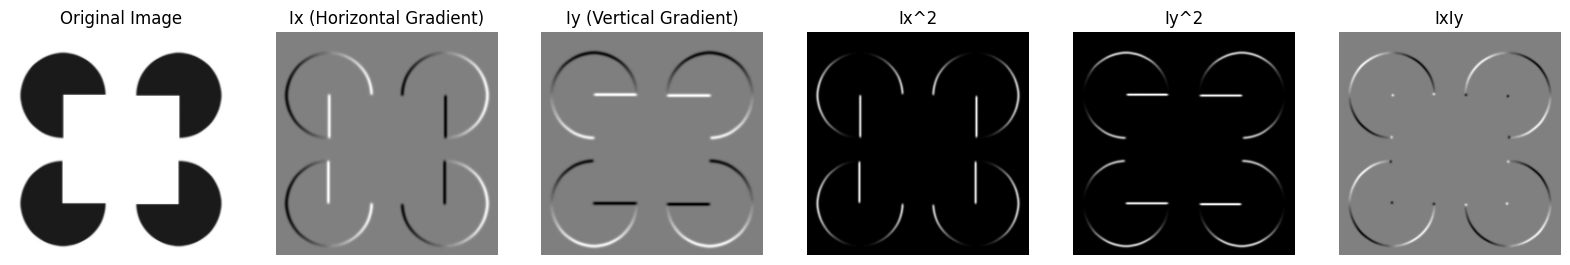

In [93]:
# Compute Ix^2, Iy^2, and IxIy
Ix2 = Ix**2
Iy2 = Iy**2
IxIy = Ix * Iy

# Display the original, Ix, Iy, Ix^2, Iy^2, and IxIy images using Matplotlib
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 6, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 6, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 6, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

# Ix^2
plt.subplot(1, 6, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 6, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 6, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

plt.show()

### Convlove Ix2, Iy2 and IxIy with the Gaussian Filter

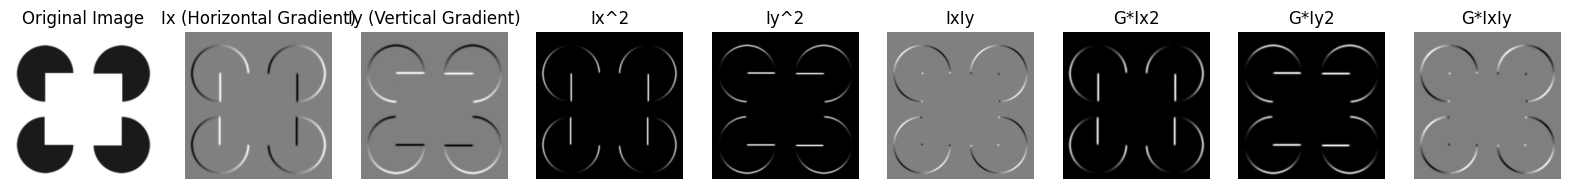

In [94]:
# Define the Gaussian filter
gaussian_kernel = cv2.getGaussianKernel(3, 1)
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel.T)
  
# Convolve with Gaussian filter
G_Ix2 = cv2.filter2D(Ix2, -1, gaussian_kernel_2d)
G_Iy2 = cv2.filter2D(Iy2, -1, gaussian_kernel_2d)
G_IxIy = cv2.filter2D(IxIy, -1, gaussian_kernel_2d)

# Display the original, Ix, Iy, Ix^2, Iy^2, IxIy, G*Ix2, G*Iy2, and G*IxIy images using Matplotlib
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 9, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 9, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix (Horizontal Gradient)')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 9, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy (Vertical Gradient)')
plt.axis('off')

# Ix^2
plt.subplot(1, 9, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 9, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 9, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

# G*Ix2
plt.subplot(1, 9, 7)
plt.imshow(G_Ix2, cmap='gray')
plt.title('G*Ix2')
plt.axis('off')

# G*Iy2
plt.subplot(1, 9, 8)
plt.imshow(G_Iy2, cmap='gray')
plt.title('G*Iy2')
plt.axis('off')

# G*IxIy
plt.subplot(1, 9, 9)
plt.imshow(G_IxIy, cmap='gray')
plt.title('G*IxIy')
plt.axis('off')

plt.show()

# Form Structure Tensor and Find Determinant

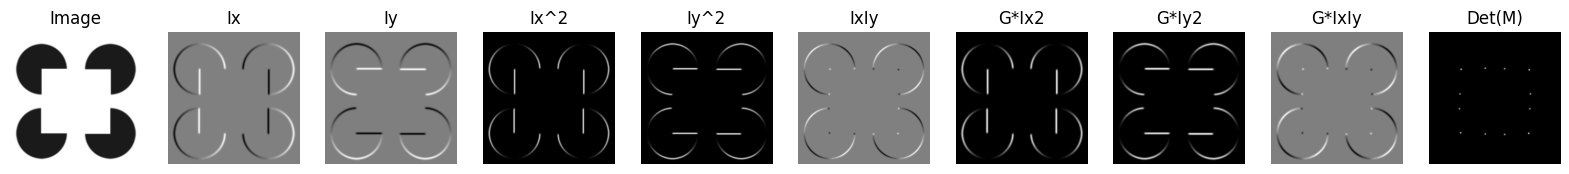

In [95]:
M_Ix2 = G_Ix2
M_Iy2 = G_Iy2
M_IxIy = G_IxIy

# COMPUTE DET(M)
det_M = M_Ix2 * M_Iy2 - M_IxIy ** 2

# Display the original, Ix, Iy, Ix^2, Iy^2, IxIy, G*Ix2, G*Iy2, G*IxIy, and the structured tensor M
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 10, 1)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.axis('off')

# Ix (Horizontal Gradient)
plt.subplot(1, 10, 2)
plt.imshow(Ix, cmap='gray')
plt.title('Ix')
plt.axis('off')

# Iy (Vertical Gradient)
plt.subplot(1, 10, 3)
plt.imshow(Iy, cmap='gray')
plt.title('Iy')
plt.axis('off')

# Ix^2
plt.subplot(1, 10, 4)
plt.imshow(Ix2, cmap='gray')
plt.title('Ix^2')
plt.axis('off')

# Iy^2
plt.subplot(1, 10, 5)
plt.imshow(Iy2, cmap='gray')
plt.title('Iy^2')
plt.axis('off')

# IxIy
plt.subplot(1, 10, 6)
plt.imshow(IxIy, cmap='gray')
plt.title('IxIy')
plt.axis('off')

# G*Ix2
plt.subplot(1, 10, 7)
plt.imshow(G_Ix2, cmap='gray')
plt.title('G*Ix2')
plt.axis('off')

# G*Iy2
plt.subplot(1, 10, 8)
plt.imshow(G_Iy2, cmap='gray')
plt.title('G*Iy2')
plt.axis('off')

# G*IxIy
plt.subplot(1, 10, 9)
plt.imshow(G_IxIy, cmap='gray')
plt.title('G*IxIy')
plt.axis('off')

# Determinant of M
plt.subplot(1, 10, 10)
plt.imshow(det_M, cmap='gray')
plt.title('Det(M)')
plt.axis('off')


plt.show()

### Compute Cornerness

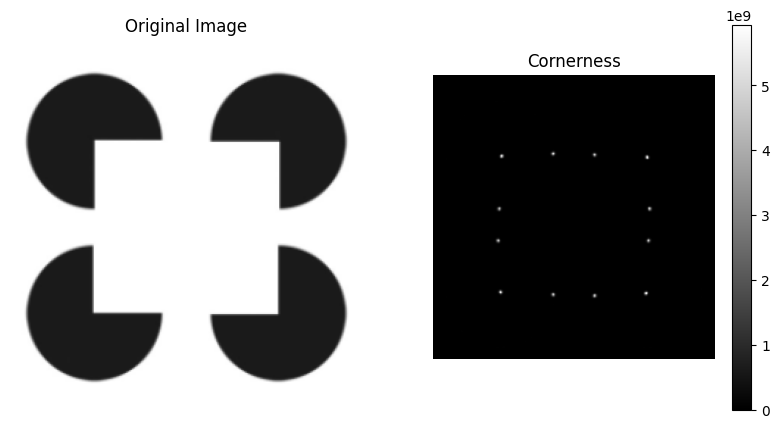

In [96]:
# Calculate cornerness
cornerness = det_M

# Display the Cornerness
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Simple Cornerness (R_simple)
plt.subplot(1, 2, 2)
plt.imshow(cornerness, cmap='gray')
plt.title('Cornerness')
plt.colorbar()
plt.axis('off')

plt.show()

### Apply Non-Max Supression

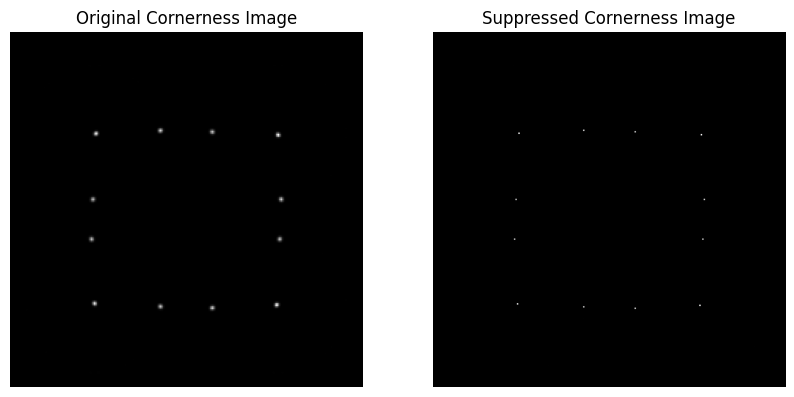

In [97]:
def non_max_suppression(cornerness, neighborhood_size=3):
    suppressed_cornerness = np.zeros_like(cornerness)
    
    # Iterate over the cornerness image
    for i in range(neighborhood_size, cornerness.shape[0] - neighborhood_size):
        for j in range(neighborhood_size, cornerness.shape[1] - neighborhood_size):
            # Get the local neighborhood
            local_region = cornerness[i - neighborhood_size:i + neighborhood_size + 1,
                                       j - neighborhood_size:j + neighborhood_size + 1]
            
            # Check if the center pixel is the maximum in the neighborhood
            if local_region[neighborhood_size, neighborhood_size] == np.max(local_region):
                suppressed_cornerness[i, j] = cornerness[i, j]
    
    return suppressed_cornerness

supressed = non_max_suppression(cornerness)

# Display the results
plt.figure(figsize=(10, 5))

# Original Cornerness Image
plt.subplot(1, 2, 1)
plt.imshow(cornerness, cmap='gray')
plt.title('Original Cornerness Image')
plt.axis('off')

# Suppressed Cornerness Image
plt.subplot(1, 2, 2)
plt.imshow(supressed, cmap='gray')
plt.title('Suppressed Cornerness Image')
plt.axis('off')

plt.show()

### Apply Thresholding

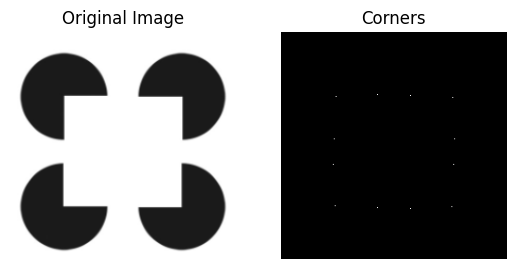

In [98]:
# Thresholding
threshold = 0.01 * np.max(supressed)
corners = np.zeros_like(supressed)
corners[supressed > threshold] = 255

# Original Cornerness Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Suppressed Cornerness Image
plt.subplot(1, 2, 2)
plt.imshow(corners, cmap='gray')
plt.title('Corners')
plt.axis('off')

plt.show()


### Summary:

Harris and Rohr corner detectors yield similar results, but Rohr achieves this with computational efficiency by avoiding the computation of the trace, a step required by the Harris detector. Consequently, Rohr delivers comparable corner detection outcomes while being computationally less expensive than Harris.